<a href="https://colab.research.google.com/github/LyraGeyska/Artifical-Intellegent/blob/main/ResikoKredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Studi kasus : Sistem evaluasi resiko kredit

Sistem ini digunakan untuk mengetahui Tingkat Resiko Kredit berdasarkan riwayat kredit nasabah

Kita perlu menginputkan Riwayat Kredit, Penghasilan dan Rasio Hutang, untuk mengetahui tingkat resiko kredit dari nasabah

Contoh kasus : ada seorang nasabah dengan Riwayat Kredit 7/10, Penghasilan 6jt/bulan dan Rasio Hutang 40%, bagaimana tingkat kredit dari nasabar tersebut?

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.0 MB/s eta 0:00:00


Profil Nasabah:
Riwayat Kredit: 7/10, Pendapatan: 6 juta/bulan, Rasio Hutang: 40%
Tingkat Resiko Kredit: 50.00
Status Resiko: SEDANG - Kredit dapat disetujui dengan pengawasan


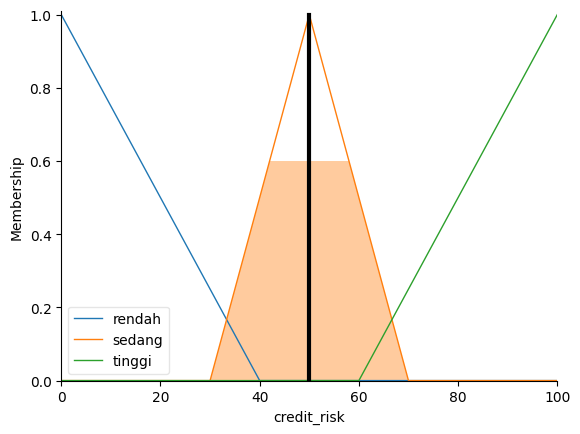

In [21]:
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# Definisikan antecedents dan consequent
credit_history = ctrl.Antecedent(np.arange(0, 11, 1), 'credit_history')
monthly_income = ctrl.Antecedent(np.arange(0, 21, 1), 'monthly_income')
debt_ratio = ctrl.Antecedent(np.arange(0, 101, 1), 'debt_ratio')
credit_risk = ctrl.Consequent(np.arange(0, 101, 1), 'credit_risk')

# Fungsi keanggotaan untuk credit_history
credit_history['buruk'] = fuzz.trimf(credit_history.universe, [0, 0, 5])
credit_history['sedang'] = fuzz.trimf(credit_history.universe, [0, 5, 10])
credit_history['baik'] = fuzz.trimf(credit_history.universe, [5, 10, 10])

# Fungsi keanggotaan untuk monthly_income (dalam juta rupiah)
monthly_income['rendah'] = fuzz.trimf(monthly_income.universe, [0, 0, 5])
monthly_income['menengah'] = fuzz.trimf(monthly_income.universe, [3, 8, 13])
monthly_income['tinggi'] = fuzz.trimf(monthly_income.universe, [10, 20, 20])

# Fungsi keanggotaan untuk debt_ratio (dalam %)
debt_ratio['rendah'] = fuzz.trimf(debt_ratio.universe, [0, 0, 35])
debt_ratio['menengah'] = fuzz.trimf(debt_ratio.universe, [25, 50, 75])
debt_ratio['tinggi'] = fuzz.trimf(debt_ratio.universe, [65, 100, 100])

# Fungsi keanggotaan untuk credit_risk
credit_risk['rendah'] = fuzz.trimf(credit_risk.universe, [0, 0, 40])
credit_risk['sedang'] = fuzz.trimf(credit_risk.universe, [30, 50, 70])
credit_risk['tinggi'] = fuzz.trimf(credit_risk.universe, [60, 100, 100])

# Aturan
rule1 = ctrl.Rule(credit_history['baik'] & monthly_income['tinggi'] & debt_ratio['rendah'], credit_risk['rendah'])
rule2 = ctrl.Rule(credit_history['baik'] & monthly_income['tinggi'] & debt_ratio['menengah'], credit_risk['rendah'])
rule3 = ctrl.Rule(credit_history['baik'] & monthly_income['menengah'] & debt_ratio['rendah'], credit_risk['rendah'])
rule4 = ctrl.Rule(credit_history['baik'] & monthly_income['menengah'] & debt_ratio['menengah'], credit_risk['sedang'])
rule5 = ctrl.Rule(credit_history['sedang'] & monthly_income['tinggi'] & debt_ratio['rendah'], credit_risk['rendah'])
rule6 = ctrl.Rule(credit_history['sedang'] & monthly_income['menengah'] & debt_ratio['menengah'], credit_risk['sedang'])
rule7 = ctrl.Rule(credit_history['sedang'] & monthly_income['rendah'] & debt_ratio['tinggi'], credit_risk['tinggi'])
rule8 = ctrl.Rule(credit_history['buruk'] & monthly_income['tinggi'] & debt_ratio['rendah'], credit_risk['sedang'])
rule9 = ctrl.Rule(credit_history['buruk'] & monthly_income['rendah'] & debt_ratio['tinggi'], credit_risk['tinggi'])

# Membuat kontrol sistem
credit_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
credit_sim = ctrl.ControlSystemSimulation(credit_ctrl)

# Input dan perhitungan untuk studi kasus
credit_sim.input['credit_history'] = 7
credit_sim.input['monthly_income'] = 6
credit_sim.input['debt_ratio'] = 40
credit_sim.compute()

# Output
print(f"Profil Nasabah:")
print(f"Riwayat Kredit: 7/10, Pendapatan: 6 juta/bulan, Rasio Hutang: 40%")
print(f"Tingkat Resiko Kredit: {credit_sim.output['credit_risk']:.2f}")

# Interpretasi hasil
if credit_sim.output['credit_risk'] <= 40:
    status = "RENDAH - Kredit dapat disetujui"
elif credit_sim.output['credit_risk'] <= 70:
    status = "SEDANG - Kredit dapat disetujui dengan pengawasan"
else:
    status = "TINGGI - Kredit ditolak"

print(f"Status Resiko: {status}")

# Visualisasi hasil
credit_risk.view(sim=credit_sim)
plt.show()
